In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_excel('fatal-police-shootings-data.xls')

In [3]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.810,33.401,True
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.986,37.500,True
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,False,attack,NaN,False,-119.326,36.240,True
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.694,39.032,True


In [4]:
data["gender"].replace({'M':'1'}, inplace = True)
data["gender"].replace({'F':'0'}, inplace = True)

data["manner_of_death"].replace({'shot':'0'}, inplace = True)
data["manner_of_death"].replace({'shot and Tasered':'1'}, inplace = True)
data["signs_of_mental_illness"] = data["signs_of_mental_illness"].astype(int)

In [5]:
data["signs_of_mental_illness"].value_counts()

0    6331
1    1671
Name: signs_of_mental_illness, dtype: int64

In [6]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,0,gun,53.0,1,A,Shelton,WA,1,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,0,gun,47.0,1,W,Aloha,OR,0,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,1,unarmed,23.0,1,H,Wichita,KS,0,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,1,W,San Francisco,CA,1,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,0,nail gun,39.0,1,H,Evans,CO,0,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,0,vehicle,NaN,1,NaN,Mesa,AZ,0,attack,NaN,False,-111.810,33.401,True
7998,8692,NaN,2022-11-30,0,knife,NaN,1,NaN,Mariposa County,CA,0,other,NaN,False,-119.986,37.500,True
7999,8694,NaN,2022-12-01,0,gun,38.0,1,NaN,Tulare,CA,0,attack,NaN,False,-119.326,36.240,True
8000,8695,NaN,2022-12-01,0,gun,NaN,1,NaN,Topeka,KS,0,other,NaN,False,-95.694,39.032,True


In [7]:
missing_values = data.isnull()
total_count = missing_values.sum()
total_count

id                            0
name                        454
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
longitude                   840
latitude                    840
is_geocoding_exact            0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8002 non-null   int64         
 1   name                     7548 non-null   object        
 2   date                     8002 non-null   datetime64[ns]
 3   manner_of_death          8002 non-null   object        
 4   armed                    7791 non-null   object        
 5   age                      7499 non-null   float64       
 6   gender                   7971 non-null   object        
 7   race                     6485 non-null   object        
 8   city                     8002 non-null   object        
 9   state                    8002 non-null   object        
 10  signs_of_mental_illness  8002 non-null   int32         
 11  threat_level             8002 non-null   object        
 12  flee                     7036 non-

In [9]:
#Data Cleaning
#Replacing the missing names with unknown value
data['name'].fillna('Unknown', inplace = True)

data['armed'].fillna('Unknown', inplace = True)

#replacing the missing ages with median values
fill_age = data['age'].median()
data['age'].fillna(fill_age, inplace = True)

#replacing the missing gender values with mode imputation 
fill_gender = data['gender'].mode().iloc[0]
data['gender'].fillna(fill_gender, inplace = True)

#replacing the flee values with mode imputation
fill_flee = data['flee'].mode().iloc[0]
data['flee'].fillna(fill_flee, inplace = True)

#removing the race values
fill_race = data['race'].mode().iloc[0]
data['race'].fillna(fill_race, inplace = True)

#removing the latitude and longitude values
data['longitude'].fillna(data['longitude'].mean(), inplace = True)
data['latitude'].fillna(data['latitude'].mean(), inplace = True)



In [10]:
missing_values = data.isnull()
total_count = missing_values.sum()
total_count

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8002 non-null   int64         
 1   name                     8002 non-null   object        
 2   date                     8002 non-null   datetime64[ns]
 3   manner_of_death          8002 non-null   object        
 4   armed                    8002 non-null   object        
 5   age                      8002 non-null   float64       
 6   gender                   8002 non-null   object        
 7   race                     8002 non-null   object        
 8   city                     8002 non-null   object        
 9   state                    8002 non-null   object        
 10  signs_of_mental_illness  8002 non-null   int32         
 11  threat_level             8002 non-null   object        
 12  flee                     8002 non-

In [12]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50','51-55','56-60', '61-65', '66-70','71-75','76-80','81-85','86-90', '91-95','96-100']

data['age-groups'] = pd.cut(data['age'], bins, labels = bin_labels)

In [13]:
data.sample(15)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,age-groups
6772,7226,Timothy Houston,2021-10-09,0,undetermined,35.0,1,W,Middlesboro,KY,0,undetermined,Not fleeing,False,-83.714,36.607,True,31-35
3083,3426,Ernest Manuel Montelongo,2018-02-18,0,gun,33.0,1,H,Guadalupe County,TX,0,attack,Car,False,-98.133,29.573,True,31-35
2355,2609,Joseph Godinez,2017-05-29,0,Unknown,20.0,1,H,Vacaville,CA,0,attack,Car,True,-121.956,38.368,True,16-20
4713,5138,David W. Shafer,2019-10-23,0,gun,61.0,1,W,Spokane,WA,1,attack,Not fleeing,False,-117.361,47.690,True,61-65
2537,2825,Kerry Bradley,2017-08-01,0,Unknown,37.0,1,B,Waco,TX,0,attack,Car,False,-97.174,31.573,True,36-40
5952,6510,Amanda Faulkner,2021-01-04,0,vehicle,35.0,0,W,Columbiana,AL,0,attack,Not fleeing,False,-86.581,33.157,True,31-35
7529,8652,Unknown,2022-06-25,0,gun,35.0,1,W,San Bernardino,CA,0,attack,Not fleeing,False,-117.314,34.092,True,31-35
328,424,Erick Emmanuel Sanchez,2015-04-30,1,metal object,22.0,1,H,El Paso,TX,0,other,Not fleeing,False,-106.342,31.694,True,21-25
3426,3768,Chavius Hollis,2018-06-12,0,gun,26.0,1,B,Monroe,GA,1,attack,Not fleeing,False,-83.751,33.893,True,26-30
7915,8638,Leontae Kirk,2022-11-02,0,gun,29.0,1,B,Phoenix,AZ,0,attack,Not fleeing,True,-112.139,33.466,True,26-30


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8002 non-null   int64         
 1   name                     8002 non-null   object        
 2   date                     8002 non-null   datetime64[ns]
 3   manner_of_death          8002 non-null   object        
 4   armed                    8002 non-null   object        
 5   age                      8002 non-null   float64       
 6   gender                   8002 non-null   object        
 7   race                     8002 non-null   object        
 8   city                     8002 non-null   object        
 9   state                    8002 non-null   object        
 10  signs_of_mental_illness  8002 non-null   int32         
 11  threat_level             8002 non-null   object        
 12  flee                     8002 non-

# Applying KNN Algorithm to predict the race

In [15]:
irrelevant_attributes = ['id','name','date','longitude','latitude','is_geocoding_exact','age-groups','body_camera']
df = data.drop(columns = irrelevant_attributes)
df

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
0,0,gun,53.0,1,A,Shelton,WA,1,attack,Not fleeing
1,0,gun,47.0,1,W,Aloha,OR,0,attack,Not fleeing
2,1,unarmed,23.0,1,H,Wichita,KS,0,other,Not fleeing
3,0,toy weapon,32.0,1,W,San Francisco,CA,1,attack,Not fleeing
4,0,nail gun,39.0,1,H,Evans,CO,0,attack,Not fleeing
...,...,...,...,...,...,...,...,...,...,...
7997,0,vehicle,35.0,1,W,Mesa,AZ,0,attack,Not fleeing
7998,0,knife,35.0,1,W,Mariposa County,CA,0,other,Not fleeing
7999,0,gun,38.0,1,W,Tulare,CA,0,attack,Not fleeing
8000,0,gun,35.0,1,W,Topeka,KS,0,other,Not fleeing


In [16]:
le = LabelEncoder()

X = df.drop('race', axis = 1)
y = le.fit_transform(df['race'])

#one-hot-encoding
# X = pd.get_dummies(X, columns=['gender', 'city', 'state', 'manner_of_death', 'armed', 'signs_of_mental_illness', 'threat_level', 'flee'])
X = pd.get_dummies(X, columns = ['manner_of_death', 'armed', 'age', 'gender', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 48)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.5646470955652717


In [17]:
#Error Rate
error = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error rate')

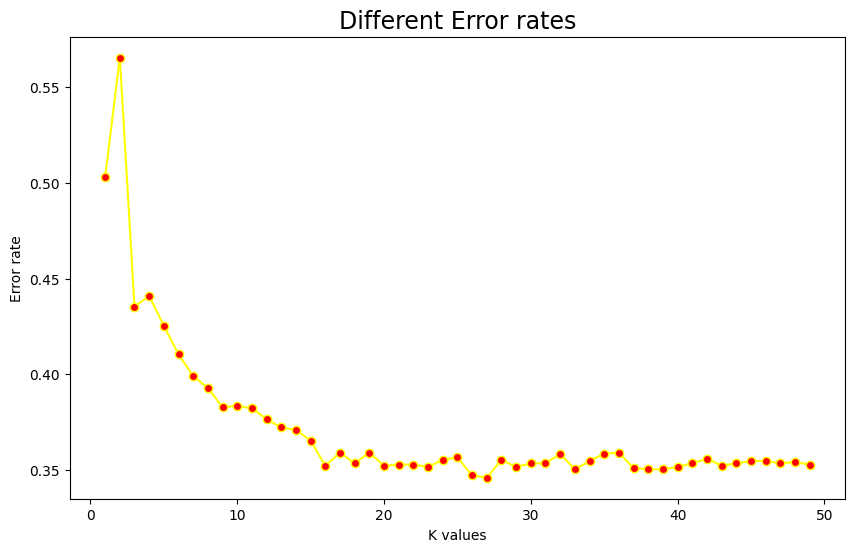

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error, color="yellow", marker="o", markerfacecolor="red")
plt.title("Different Error rates", fontsize=17)
plt.xlabel("K values")
plt.ylabel("Error rate")

In [19]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.6483447845096815


# Logistic Regression Model to predict the race

In [20]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
print(lr_accuracy)

0.6670830730793255


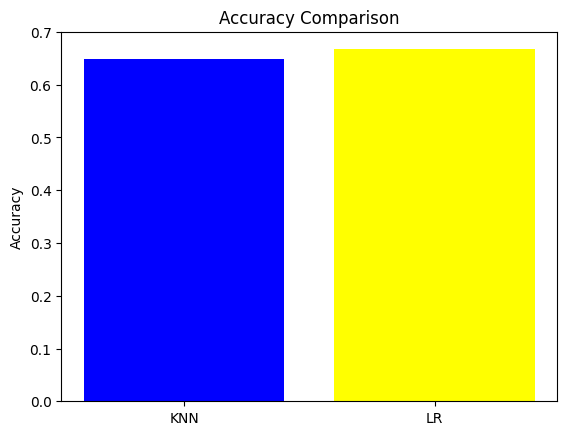

In [21]:
scores = [accuracy, lr_accuracy]
model = ['KNN','LR' ]

plt.bar(model, scores, color = ['blue','yellow'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()